/Users/emilybirch/CEGE0004


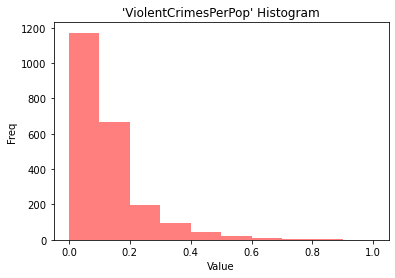

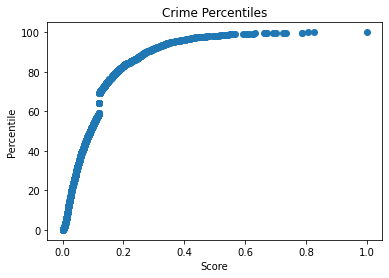

(1881, 100)
[[ 0.1709585   0.86115875 -0.69514359 ...  0.65091754 -0.65825201
  -1.60502361]
 [ 0.5682599   0.66156113 -0.14248086 ...  0.35222533  0.38228698
   0.65860842]
 [-0.19412927 -0.39406151 -0.1774193  ... -0.10631744 -1.14383688
  -1.60502361]
 ...
 [-0.99368801 -1.04745553  0.46100144 ...  0.14396288  0.65976405
  -1.60502361]
 [ 0.81275307  0.58997293 -0.74278693 ... -2.06836901 -0.38077495
   0.66701496]
 [-0.93256471  0.61909356  0.24184208 ...  1.01537684 -0.31140568
  -1.60502361]]


In [3]:
# run preprocessing
%pwd  
%cd /Users/emilybirch/CEGE0004
%run alt_Preprocessing.ipynb

#import the required pacakages
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.constraints import maxnorm


# Split the data into training and test data sets using sklearn.model_selection
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.85, random_state=1)


# transform x features
sc = StandardScaler()
sc.fit(x_train)
X_train = sc.transform(x_train)


sc = StandardScaler()
sc.fit(x_test)
X_test_transf = sc.transform(x_test)


# check that the data is transformed such that its distribution will have a mean value 0 and standard deviation of 1.
print(X_train)

In [4]:
print(X_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1881, 100) (333, 100) (1881,) (333,)


Different model variations:
1. 84.69% accuracy with Adagrad optimiser, 1 neuron, 0.2 dropout rate, 50 epochs and 5 batch size 
2. 75.91% accuracy with stochastic gradient descent, learning rate 0.3, momentum 0.


Results of grid search to optimise hyperparameters found:

1. Will use epochs=50 and batch size=5 for speed
2. The optimizer providing the best model accuracy is 'Adagrad'
3. the optimal learning rate and momentum are: is 'learn_rate': 0.3 and 'momentum': 0.0.

In [7]:
# Function to create model, required for KerasClassifier

# def create_model(learn_rate=0.3, momentum=0):
# def create_model(init='glorot_uniform', neurons=1, dropout_rate=0.2, learn_rate=0.3, momentum=0):
def create_model(optimizer='Adagrad', init='glorot_uniform', neurons=1, dropout_rate=0.2):
    # create model
    model = Sequential()
    # adding more layers by trial and error
    model.add(Dense(neurons, input_dim=100, kernel_initializer='uniform', activation='linear', kernel_constraint=maxnorm(4)))
    model.add(Dropout(dropout_rate))
    # model.add(Dense(30, input_dim=100, kernel_initializer=init, activation='relu'))
    model.add(Dense(1, kernel_initializer=init, activation='sigmoid')) # kernel_initializer=init
    print(model.summary())
    # Compile model
    # optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
 
    
# https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/
# plot model to confirm layer order, output shape of each layer and the parameters

# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
    

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 1)                 101       
_________________________________________________________________
dropout_17 (Dropout)         (None, 1)                 0         
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 2         
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 1)                 101       
_________________________________________________________________
dropout_18 (Dropout)         (None, 1)                 0         
___________________________

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 1)                 101       
_________________________________________________________________
dropout_28 (Dropout)         (None, 1)                 0         
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 2         
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 1)                 101       
_________________________________________________________________
dropout_29 (Dropout)         (None, 1)                 0         
___________________________

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 1)                 101       
_________________________________________________________________
dropout_39 (Dropout)         (None, 1)                 0         
_________________________________________________________________
dense_78 (Dense)             (None, 1)                 2         
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 1)                 101       
_________________________________________________________________
dropout_40 (Dropout)         (None, 1)                 0         
___________________________

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 1)                 101       
_________________________________________________________________
dropout_50 (Dropout)         (None, 1)                 0         
_________________________________________________________________
dense_100 (Dense)            (None, 1)                 2         
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_101 (Dense)            (None, 1)                 101       
_________________________________________________________________
dropout_51 (Dropout)         (None, 1)                 0         
___________________________

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_121 (Dense)            (None, 1)                 101       
_________________________________________________________________
dropout_61 (Dropout)         (None, 1)                 0         
_________________________________________________________________
dense_122 (Dense)            (None, 1)                 2         
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_123 (Dense)            (None, 1)                 101       
_________________________________________________________________
dropout_62 (Dropout)         (None, 1)                 0         
___________________________

Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_143 (Dense)            (None, 1)                 101       
_________________________________________________________________
dropout_72 (Dropout)         (None, 1)                 0         
_________________________________________________________________
dense_144 (Dense)            (None, 1)                 2         
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_145 (Dense)            (None, 1)                 101       
_________________________________________________________________
dropout_73 (Dropout)         (None, 1)                 0         
___________________________

Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_165 (Dense)            (None, 1)                 101       
_________________________________________________________________
dropout_83 (Dropout)         (None, 1)                 0         
_________________________________________________________________
dense_166 (Dense)            (None, 1)                 2         
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_167 (Dense)            (None, 1)                 101       
_________________________________________________________________
dropout_84 (Dropout)         (None, 1)                 0         
___________________________

Model: "sequential_94"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_187 (Dense)            (None, 1)                 101       
_________________________________________________________________
dropout_94 (Dropout)         (None, 1)                 0         
_________________________________________________________________
dense_188 (Dense)            (None, 1)                 2         
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_95"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_189 (Dense)            (None, 1)                 101       
_________________________________________________________________
dropout_95 (Dropout)         (None, 1)                 0         
___________________________

Model: "sequential_105"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_209 (Dense)            (None, 1)                 101       
_________________________________________________________________
dropout_105 (Dropout)        (None, 1)                 0         
_________________________________________________________________
dense_210 (Dense)            (None, 1)                 2         
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_106"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_211 (Dense)            (None, 1)                 101       
_________________________________________________________________
dropout_106 (Dropout)        (None, 1)                 0         
_________________________

Model: "sequential_116"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_231 (Dense)            (None, 1)                 101       
_________________________________________________________________
dropout_116 (Dropout)        (None, 1)                 0         
_________________________________________________________________
dense_232 (Dense)            (None, 1)                 2         
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________
None


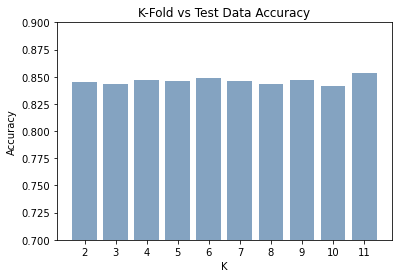

Smaller: 85.33% (1.63%)


In [10]:
# the cross_val_score will clone the supplied model and use them for cross-validation folds.    
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

kfold_scores = {}
for i in range(2,12):
    kfold = StratifiedKFold(n_splits=10, shuffle=True)
    classifier = KerasClassifier(build_fn = create_model, batch_size = 5, epochs = 50, verbose=0)
    accuracies = cross_val_score(classifier, X_train, y_train, cv= kfold)
    res = {str(i): accuracies.mean()}
    kfold_scores.update(res)

for key in kfold_scores:
    plt.bar([key], kfold_scores[key], label=key, color=(0.2, 0.4, 0.6, 0.6))

plt.title('K-Fold vs Test Data Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.ylim(0.7, 0.9)
plt.show()


print("Smaller: %.2f%% (%.2f%%)" % (accuracies.mean()*100, accuracies.std()*100))


# run this instead because the loop takes >4 hours to run
# kfold = StratifiedKFold(n_splits=10, shuffle=True)
# classifier = KerasClassifier(build_fn = create_model, batch_size = 5, epochs = 50, verbose=0)
# accuracies = cross_val_score(classifier, X_train, y_train, cv= kfold)
# print("Smaller: %.2f%% (%.2f%%)" % (accuracies.mean()*100, accuracies.std()*100))



In [12]:
train_pred = classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test_transf)
y_pred = (y_pred > 0.5)


from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Model: "sequential_118"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_235 (Dense)            (None, 1)                 101       
_________________________________________________________________
dropout_118 (Dropout)        (None, 1)                 0         
_________________________________________________________________
dense_236 (Dense)            (None, 1)                 2         
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________
None
              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88       220
         1.0       0.85      0.63      0.72       113

    accuracy                           0.83       333
   macro avg       0.84      0.78      0.80       333
weighted avg       0.84      0.83      0.83       333



In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

classes = ['Low Violence', 'High Violence']
def plot_confusionmatrix(train_pred, train, dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(train_pred,train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()